In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('death_clean.csv')

df.head()


,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...


TRANSFORMASI & SPLIT DATA

In [25]:
x = df[['Cause', 'Type']]
y = df[['Total Deaths']]

x_encoded = pd.get_dummies(x, columns=['Cause', 'Type'])

scaler = StandardScaler()
y_norm = scaler.fit_transform(y).ravel()

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_norm, test_size=0.3, random_state=42)


MODELING

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([ 0.07870671, -0.17209176, -0.39902886, -0.24420887,  0.01879975,
        0.01879975, -0.17209176, -0.54631656, -0.51079979, -0.4381682 ,
       -0.54901008,  2.49743718, -0.17209176,  0.19751099,  1.39304012,
       -0.17209176, -0.54631656,  2.49743718, -0.50287445, -0.41286201,
       -0.40749142,  0.36746737,  0.43298167, -0.48725897, -0.17209176,
       -0.54899637, -0.54901008, -0.40465053, -0.0308586 , -0.0308586 ,
       -0.49272664, -0.54830487, -0.54631656, -0.17209176, -0.3813588 ,
       -0.17209176,  2.49743718,  0.36746737, -0.1245326 , -0.1245326 ,
        0.07870671, -0.54902771, -0.49585464, -0.17209176, -0.3813588 ,
        0.63798715,  0.01879975, -0.0308586 , -0.42833868, -0.0308586 ,
       -0.40749142, -0.44332239, -0.54902771, -0.54631656, -0.48735147,
       -0.53776476,  0.01879975,  0.01879975,  0.04674332,  2.45713162,
       -0.54631656, -0.54631656, -0.45937152,  0.41556291, -0.24420887,
        2.49743718,  0.36512237,  0.63798715,  0.01879975,  0.04

In [27]:
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()

results_df = pd.DataFrame({
    'Actual Total Deaths': y_test_orig,
    'Predicted Total Deaths': y_pred_orig
})

results_df

,Actual Total Deaths,Predicted Total Deaths
0,99.0,89.073424
1,35.0,53.509929
2,34.0,21.330000
3,49.0,43.283643
4,42.0,80.578553
...,...,...
160,129.0,211.251387
161,184.0,127.182364
162,0.0,1.925865
163,0.0,13.949828


SCORE

In [28]:
score = model.score(x_test, y_test)
print(f"Random forest regressor score: {score}")

Random forest regressor score: 0.7260842935176017


IMPORTANCE FITUR

In [29]:
importances = model.feature_importances_

feature_names = x_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,Cause_AIDS,0.161695
24,Cause_Demam Berdarah Dengue (DBD),0.107983
119,"Cause_Malformasi, Deformasi Kongenital & Kelai...",0.074867
108,Cause_Kronis Filariasis,0.070951
34,Cause_Gangguan saluran napas lainnya yang berh...,0.069640
...,...,...
68,Cause_KLB Keracunan,0.000000
103,Cause_Kolera,0.000000
64,Cause_KLB Gizi Buruk,0.000000
110,Cause_Ledakan Akibat Gas,0.000000


VISUALISASI

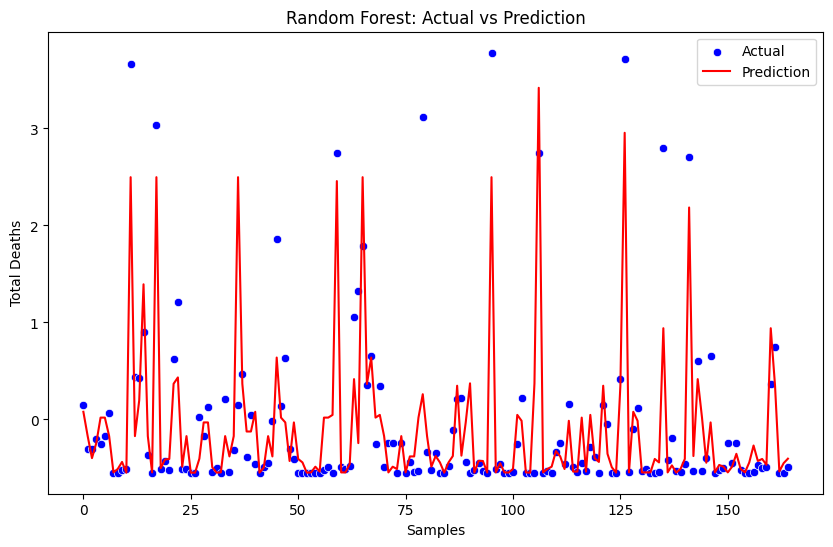

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test, color='blue', label='Actual')
sns.lineplot(x=range(len(y_test)), y=y_pred, color='red', label='Prediction')

plt.xlabel('Samples')
plt.ylabel('Total Deaths')
plt.title('Random Forest: Actual vs Prediction')
plt.legend()
plt.show()

In [31]:
import graphviz
from io import StringIO
from sklearn.tree import export_graphviz
import os

x_encoded.columns = x_encoded.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

output_dir = '/Applications/MAMP/htdocs/local/kodingakademi/Python/python 3/machine learning/ML/Supervised learning/tree_pdf'

os.makedirs(output_dir, exist_ok=True)

for i, tree in enumerate(model.estimators_):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, 
                    feature_names=x_encoded.columns,
                    filled=True, rounded=True, special_characters=False)
    
    graph = graphviz.Source(dot_data.getvalue())
    tree_filename = os.path.join(output_dir, f"decision_tree_{i}")
    graph.render(tree_filename, format='pdf')
    
    # Jika ingin melihatnya langsung, bisa digunakan perintah view:
    # graph.view(filename=tree_filename)


RANDOM FOREST CLASSIFIER

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv("penyakit_jantung.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,female,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,female,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,male,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,female,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,male,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# atau 

# scalerX_test = StandardScaler()
# scalerX_train = StandardScaler()
# X_train_scaled = scalerX_test.fit_transform(X_train)
# X_test_scaled = scalerX_train.fit_transform(X_test)


In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1])

In [35]:
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

results_df

,Actual,Predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
86,0,0
87,1,1
88,1,1
89,1,1


In [36]:
score = model.score(X_test_scaled, y_test)
print(f'Random forest classifier score: {score:.2f}')

Random forest classifier score: 0.82


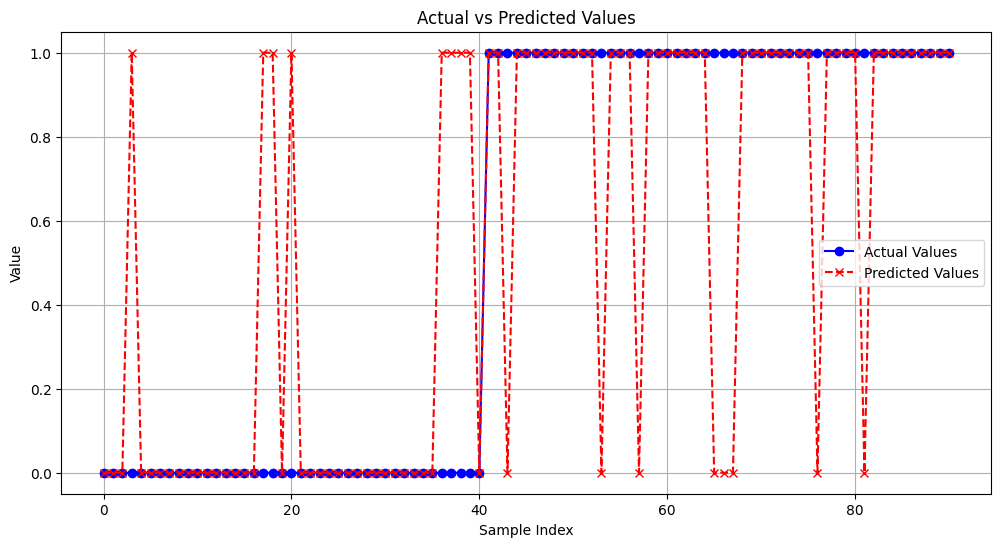

In [37]:
sorted_indices = np.argsort(y_test.values)
sorted_y_test = y_test.values[sorted_indices]
sorted_y_pred = y_pred[sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(sorted_y_test, marker='o', linestyle='-', color='b', label='Actual Values')
plt.plot(sorted_y_pred, marker='x', linestyle='--', color='r', label='Predicted Values')

plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()